In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("US Superstore data.xls")

In [3]:
print(df.head())
print(df.info())
print(df.isnull().sum())


   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   South  FUR-BO-10

In [4]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])


Question 1

State
California      457687.6315
New York        310876.2710
Texas           170188.0458
Washington      138641.2700
Pennsylvania    116511.9140
Florida          89473.7080
Illinois         80166.1010
Ohio             78258.1360
Michigan         76269.6140
Virginia         70636.7200
Name: Sales, dtype: float64


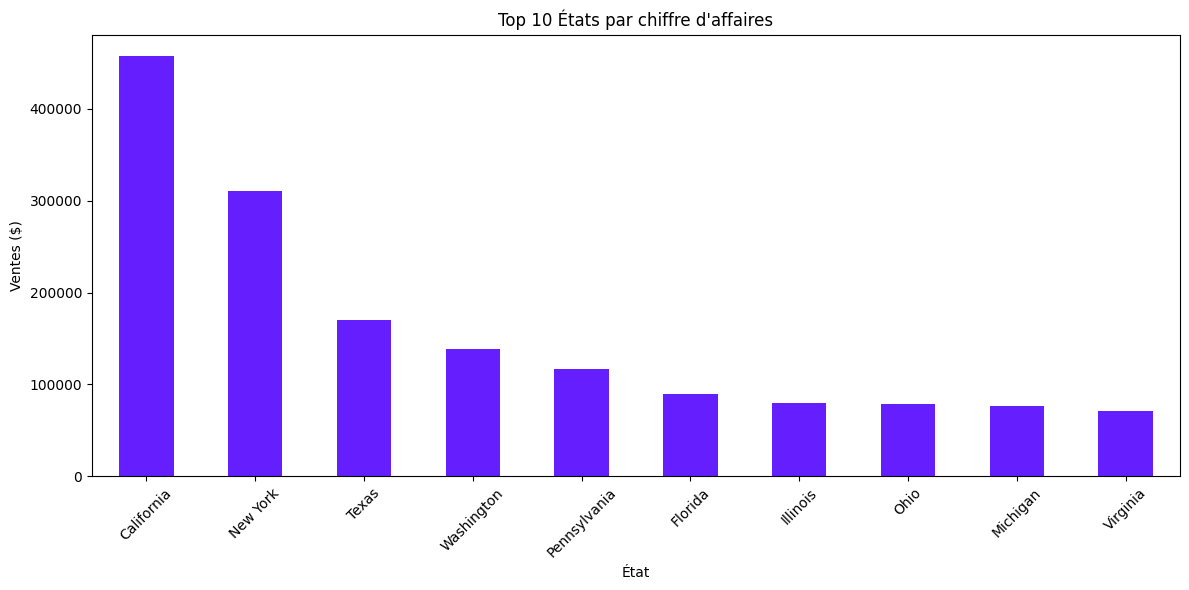

In [5]:
state_sales = df.groupby('State')['Sales'].sum().sort_values(ascending=False)
print(state_sales.head(10))

import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
state_sales.head(10).plot(kind='bar', color='#651FFF')
plt.title('Top 10 États par chiffre d\'affaires')
plt.xlabel('État')
plt.ylabel('Ventes ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Question 2

                  Sales      Profit
State                              
California  457687.6315  76381.3871
New York    310876.2710  74038.5486


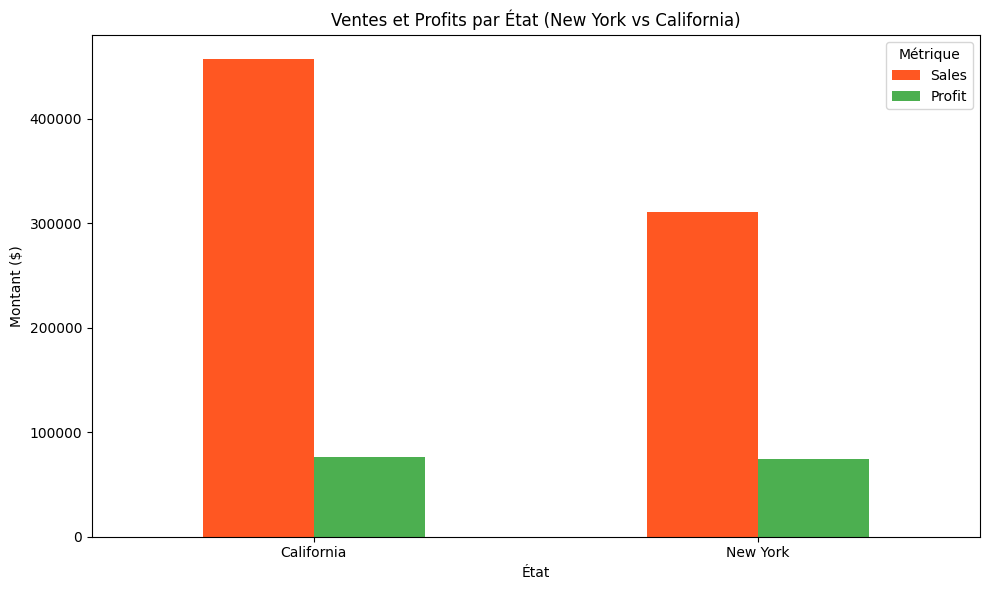

In [6]:
ny_ca = df[df["State"].isin(["New York", "California"])]
sales_profit = ny_ca.groupby("State")[["Sales", "Profit"]].sum()
print(sales_profit)

import matplotlib.pyplot as plt

sales_profit.plot(kind='bar', figsize=(10, 6), color=['#FF5722', '#4CAF50'])
plt.title('Ventes et Profits par État (New York vs California)')
plt.xlabel('État')
plt.ylabel('Montant ($)')
plt.xticks(rotation=0)
plt.legend(title='Métrique')
plt.tight_layout()
plt.show()

Question 3

Outstanding customer à New York :
Customer Name
Tom Ashbrook    13723.498
Name: Sales, dtype: float64


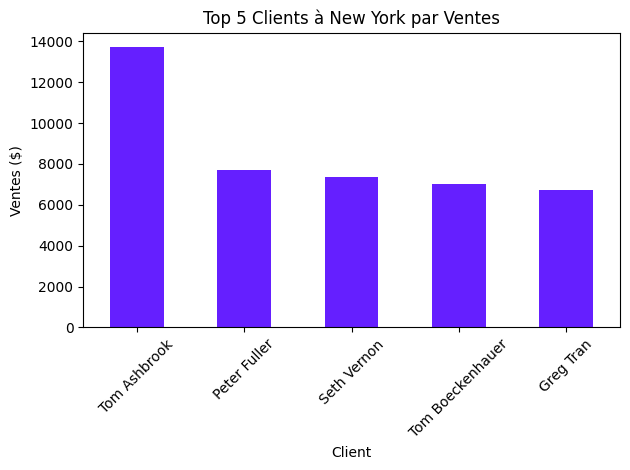

In [12]:
ny_customer = df[df["State"] == "New York"]


ny_customer_sales = ny_customer.groupby("Customer Name")["Sales"].sum().sort_values(ascending=False)

top_ny_customer = ny_customer_sales.head(1)
print("Outstanding customer à New York :")
print(top_ny_customer)

import matplotlib.pyplot as plt

ny_customer_sales.head(5).plot(kind='bar', color='#651FFF')
plt.title('Top 5 Clients à New York par Ventes')
plt.xlabel('Client')
plt.ylabel('Ventes ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Question 4

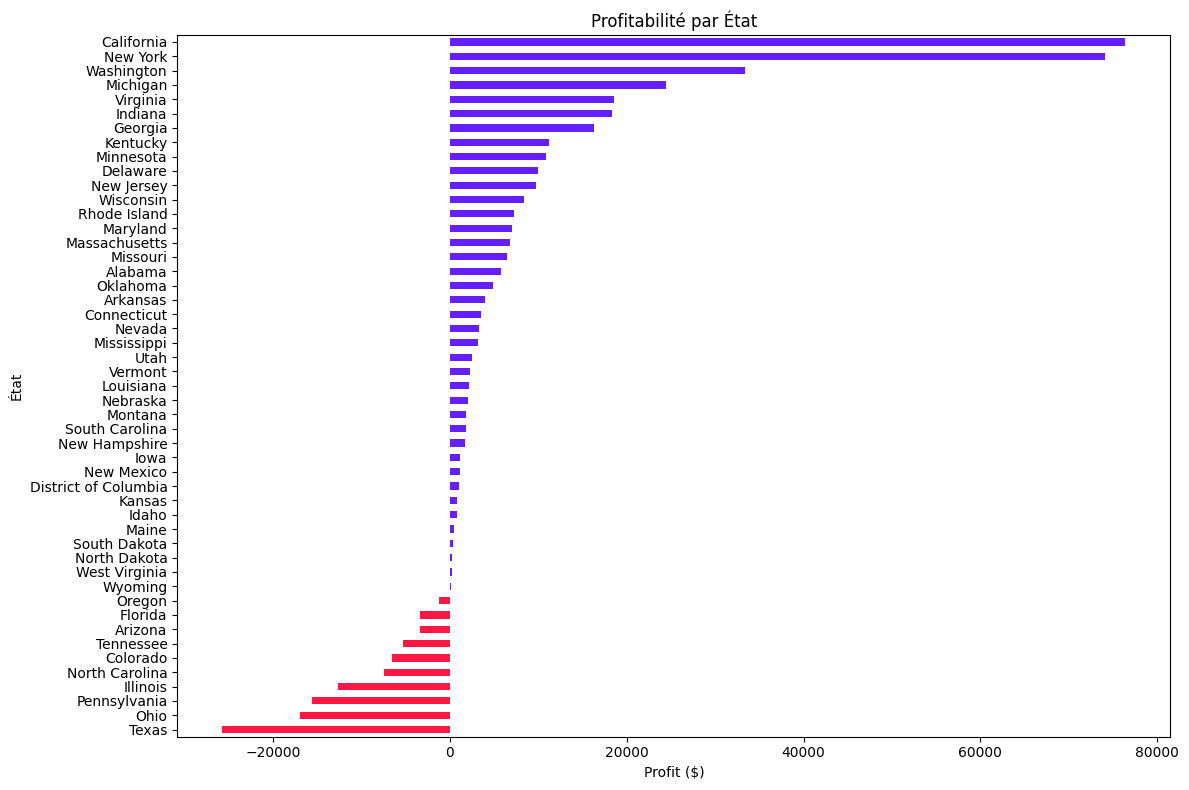

In [14]:
state_profit = df.groupby('State')['Profit'].sum().sort_values()

state_profit.head(10)

import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
state_profit.plot(kind='barh', color=['#FF1744' if p < 0 else '#651FFF' for p in state_profit])
plt.title("Profitabilité par État")
plt.xlabel("Profit ($)")
plt.ylabel("État")
plt.tight_layout()
plt.show()

Question 5

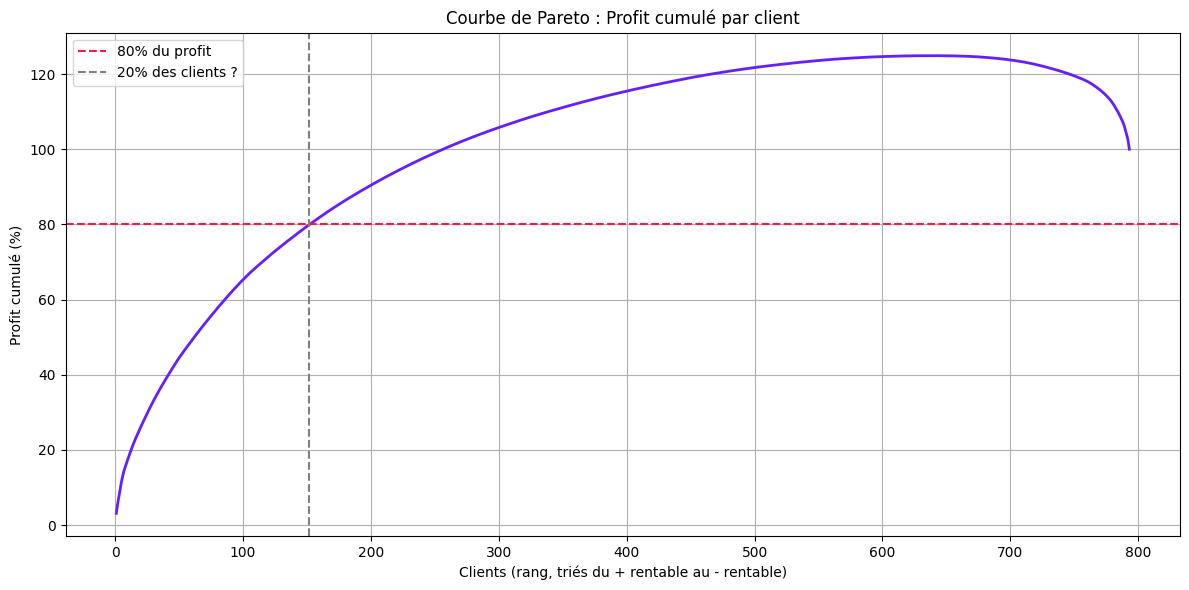

152 clients sur 793 génèrent 80% des profits.
--> Soit 19.17% des clients.
✅ La loi de Pareto est bien respectée (20/80).


In [18]:
customer_profit = df.groupby("Customer Name")["Profit"].sum().sort_values(ascending=False)

cumulative_profit = customer_profit.cumsum()
cumulative_percent = 100 * cumulative_profit / customer_profit.sum()

pareto_df = pd.DataFrame({
    "Profit" : customer_profit,
    "Cumulative %" : cumulative_percent
})

import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(range(1, len(pareto_df)+1), pareto_df["Cumulative %"], color='#651FFF', linewidth=2)
plt.axhline(y=80, color='#FF1744', linestyle='--', label='80% du profit')
plt.axvline(x=pareto_df[pareto_df["Cumulative %"] <= 80].shape[0], color='gray', linestyle='--', label='20% des clients ?')
plt.title("Courbe de Pareto : Profit cumulé par client")
plt.xlabel("Clients (rang, triés du + rentable au - rentable)")
plt.ylabel("Profit cumulé (%)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


top_clients = pareto_df[pareto_df["Cumulative %"] <= 80]
print(f"{top_clients.shape[0]} clients sur {pareto_df.shape[0]} génèrent 80% des profits.")
pourcentage = round(100 * top_clients.shape[0] / pareto_df.shape[0], 2)
print(f"--> Soit {pourcentage}% des clients.")
if 17 <= pourcentage <= 23:
    print("✅ La loi de Pareto est bien respectée (20/80).")
else:
    print("❌ La loi de Pareto n'est pas respectée ici.")




Question 6

🔝 Top 20 villes par VENTES :
City
New York City    256368.1610
Los Angeles      175851.3410
Seattle          119540.7420
San Francisco    112669.0920
Philadelphia     109077.0130
Houston           64504.7604
Chicago           48539.5410
San Diego         47521.0290
Jacksonville      44713.1830
Springfield       43054.3420
Detroit           42446.9440
Columbus          38706.2430
Newark            28576.1190
Columbia          25283.3240
Lafayette         25036.2000
Jackson           24963.8580
San Antonio       21843.5280
Burlington        21668.0820
Arlington         20214.5320
Dallas            20131.9322
Name: Sales, dtype: float64

💰 Top 20 villes par PROFIT :
City
New York City    62036.9837
Los Angeles      30440.7579
Seattle          29156.0967
San Francisco    17507.3854
Detroit          13181.7908
Lafayette        10018.3876
Jackson           7581.6828
Atlanta           6993.6629
Minneapolis       6824.5846
San Diego         6377.1960
Springfield       6200.6974
Columbus       

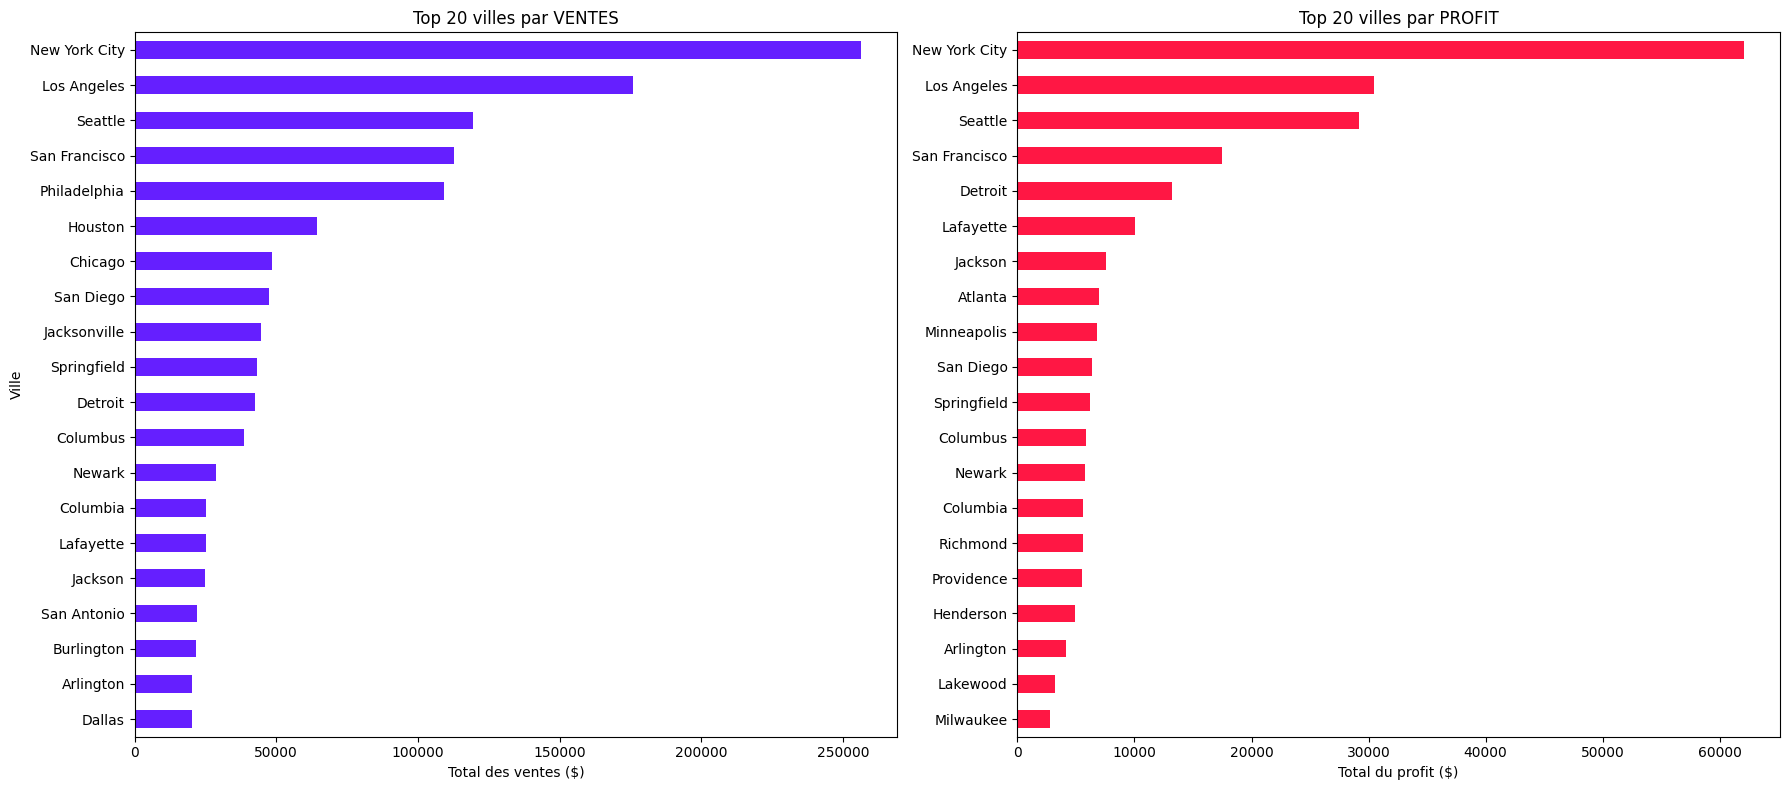

Villes avec uniquement des ventes élevées : {'Jacksonville', 'Houston', 'San Antonio', 'Philadelphia', 'Dallas', 'Chicago', 'Burlington'}
Villes avec uniquement des profits élevés : {'Milwaukee', 'Minneapolis', 'Providence', 'Lakewood', 'Henderson', 'Richmond', 'Atlanta'}
Villes avec à la fois des ventes et des profits élevés : {'Jackson', 'Detroit', 'Columbia', 'Newark', 'Seattle', 'New York City', 'Arlington', 'San Diego', 'San Francisco', 'Springfield', 'Columbus', 'Los Angeles', 'Lafayette'}


In [19]:

top_cities_sales = df.groupby("City")["Sales"].sum().sort_values(ascending=False).head(20)


top_cities_profit = df.groupby("City")["Profit"].sum().sort_values(ascending=False).head(20)

print("🔝 Top 20 villes par VENTES :")
print(top_cities_sales)

print("\n💰 Top 20 villes par PROFIT :")
print(top_cities_profit)

import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Ventes
top_cities_sales.sort_values().plot(kind='barh', ax=axes[0], color='#651FFF')
axes[0].set_title("Top 20 villes par VENTES")
axes[0].set_xlabel("Total des ventes ($)")
axes[0].set_ylabel("Ville")

# Profits
top_cities_profit.sort_values().plot(kind='barh', ax=axes[1], color='#FF1744')
axes[1].set_title("Top 20 villes par PROFIT")
axes[1].set_xlabel("Total du profit ($)")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()

top_sales_cities = set(top_cities_sales.index)
top_profit_cities = set(top_cities_profit.index)

only_sales = top_sales_cities - top_profit_cities
only_profit = top_profit_cities - top_sales_cities
common = top_sales_cities & top_profit_cities

print(f"Villes avec uniquement des ventes élevées : {only_sales}")
print(f"Villes avec uniquement des profits élevés : {only_profit}")
print(f"Villes avec à la fois des ventes et des profits élevés : {common}")


Question 7

🔝 Top 20 clients par chiffre d'affaires :
Customer Name
Sean Miller           25043.050
Tamara Chand          19052.218
Raymond Buch          15117.339
Tom Ashbrook          14595.620
Adrian Barton         14473.571
Ken Lonsdale          14175.229
Sanjit Chand          14142.334
Hunter Lopez          12873.298
Sanjit Engle          12209.438
Christopher Conant    12129.072
Todd Sumrall          11891.751
Greg Tran             11820.120
Becky Martin          11789.630
Seth Vernon           11470.950
Caroline Jumper       11164.974
Clay Ludtke           10880.546
Maria Etezadi         10663.728
Karen Ferguson        10604.266
Bill Shonely          10501.653
Edward Hooks          10310.880
Name: Sales, dtype: float64


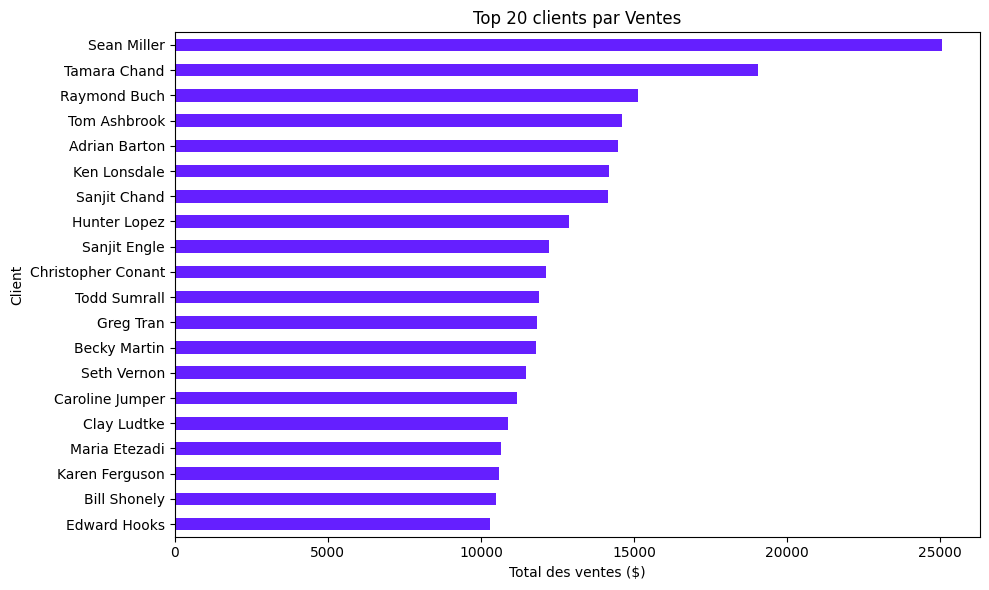

In [20]:
top_customers_sales = df.groupby("Customer Name")["Sales"].sum().sort_values(ascending=False).head(20)

print("🔝 Top 20 clients par chiffre d'affaires :")
print(top_customers_sales)

import matplotlib.pyplot as plt

top_customers_sales.sort_values().plot(kind='barh', figsize=(10,6), color='#651FFF')
plt.title("Top 20 clients par Ventes")
plt.xlabel("Total des ventes ($)")
plt.ylabel("Client")
plt.tight_layout()
plt.show()




Question 8

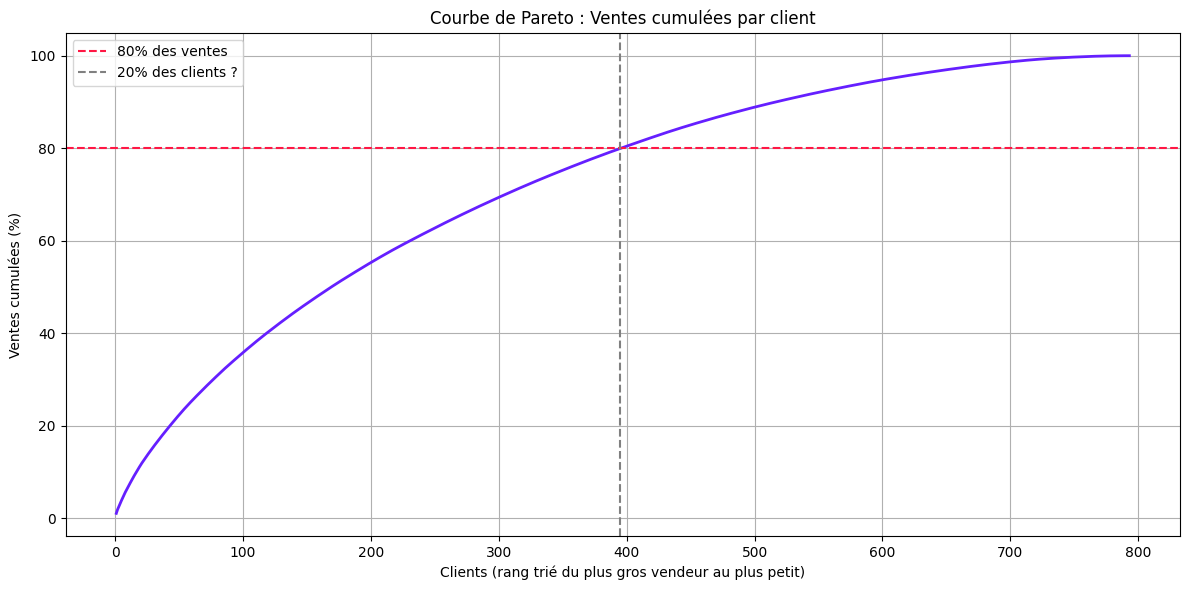

395 clients sur 793 génèrent 80% des ventes.
Soit 49.81% des clients.
❌ La loi de Pareto n'est pas respectée ici.


In [21]:
customer_sales = df.groupby("Customer Name")["Sales"].sum().sort_values(ascending=False)

cumulative_sales = customer_sales.cumsum()
cumulative_percent_sales = 100 * cumulative_sales / customer_sales.sum()

pareto_sales_df = pd.DataFrame({
    "Sales": customer_sales,
    "Cumulative %": cumulative_percent_sales
})

import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(range(1, len(pareto_sales_df)+1), pareto_sales_df["Cumulative %"], color='#651FFF', linewidth=2)
plt.axhline(y=80, color='#FF1744', linestyle='--', label='80% des ventes')
plt.axvline(x=pareto_sales_df[pareto_sales_df["Cumulative %"] <= 80].shape[0], color='gray', linestyle='--', label='20% des clients ?')
plt.title("Courbe de Pareto : Ventes cumulées par client")
plt.xlabel("Clients (rang trié du plus gros vendeur au plus petit)")
plt.ylabel("Ventes cumulées (%)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


top_clients_sales = pareto_sales_df[pareto_sales_df["Cumulative %"] <= 80]
nb_top_clients_sales = top_clients_sales.shape[0]
total_clients_sales = pareto_sales_df.shape[0]
pourcentage_clients_sales = 100 * nb_top_clients_sales / total_clients_sales

print(f"{nb_top_clients_sales} clients sur {total_clients_sales} génèrent 80% des ventes.")
print(f"Soit {pourcentage_clients_sales:.2f}% des clients.")

if 17 <= pourcentage_clients_sales <= 23:
    print("✅ La loi de Pareto est bien respectée (20/80).")
else:
    print("❌ La loi de Pareto n'est pas respectée ici.")

Question 9

In [22]:
state_perf = df.groupby("State")[["Sales", "Profit"]].sum().sort_values(by="Profit", ascending=False)
print(state_perf.head(5))

city_perf = df.groupby("City")[["Sales", "Profit"]].sum()
city_perf["Profit Margin %"] = 100 * city_perf["Profit"] / city_perf["Sales"]
top_cities = city_perf.sort_values(by="Profit", ascending=False).head(20)
low_margin_cities = city_perf[city_perf["Profit Margin %"] < 0].sort_values(by="Profit Margin %")


                  Sales      Profit
State                              
California  457687.6315  76381.3871
New York    310876.2710  74038.5486
Washington  138641.2700  33402.6517
Michigan     76269.6140  24463.1876
Virginia     70636.7200  18597.9504


In [ ]:
!git add .
!git commit -m "Analyse des données de vente et profitabilité"
!git push origin main